## Generate plots for the bianisotropic disk with holes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import dill as pickle
import os.path as osp

In [2]:
savefigs = False

In [3]:
savepath = "."
extension = ".pdf"

def savefigure(filename):
    if savefigs:
        plt.savefig(osp.join(savepath, filename+extension), dpi=600)

In [4]:
with open("holey-disk.pickle", "rb") as infile:
    data = pickle.load(infile)
print(data.keys())

# automatically load all saved variables
for key,val in data.items():
        exec(key + '=val')


dict_keys(['extinction', 'extinction_modes', 'wanted_extinction', 'unwanted_modes', 'sim', 'wanted_modes', 'parameters', 'refined', 'wanted_groups', 'full_modes', 'freqs'])


In [5]:
from openmodes.sources import PlaneWaveSource
pw = PlaneWaveSource([1, 0, 0], [0, 0, 1], p_inc=1.0)

from openmodes.model import ModelMutualWeight

def group_current(modes, group, source):
    part = modes.parent_part
    s = 1j*np.abs(modes.s[0, group[0]].imag)
    
    which_modes = modes.select(group)
    model = ModelMutualWeight(which_modes)
    V = sim.source_vector(source, s, parent=part)
    V_modes = which_modes.vl.dot(V)
    Z = model.impedance(s)
    I_modes = Z.solve(V_modes)
    I = which_modes.vr.dot(I_modes)
    return I, s
        

In [6]:
import matplotlib.gridspec as gridspec

def plot_current_multipoles(current, s, num_multipoles, image, marker_colour, marker, mode_name, filename=None):
    a_e, a_m = sim.multipole_decomposition(current, num_multipoles, s)

    a_e_list = np.zeros(num_multipoles+1)
    a_m_list = np.zeros_like(a_e_list)

    lrange = np.arange(num_multipoles+1)
    
    for l in lrange[1:]:        
        # normalise to scattering contribution
        for m in range(-l, l+1):
            a_e_list[l] += np.abs(a_e[l, m])**2#*(2*l+1)
            a_m_list[l] += np.abs(a_m[l, m])**2#*(2*l+1)

    max_element = np.sum(a_e_list)+np.sum(a_m_list)
    
    a_e_list /= max_element
    a_m_list /= max_element

    a_e_list = np.sqrt(np.abs(a_e_list))
    a_m_list = np.sqrt(np.abs(a_m_list))

    width = 0.6
    ind = np.arange(1, len(a_e_list))

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(2, 2, width_ratios=[6,4])
    ax1 = plt.subplot(gs[0, 1])
    ax2 = plt.subplot(gs[1, 1])
    ax3 = plt.subplot(gs[:, 0])
    
    fig.subplots_adjust(left=-0.02, right=0.98, wspace=0.05, bottom=0.15, top=0.99, hspace=0.05)
    
    electric_colours = palette_multipoles[0] #:3]
    magnetic_colours = palette_multipoles[1] #3:]
    bars_elec = ax1.bar(ind-0.5*width, a_e_list[1:], width, color=electric_colours,
                        label="electric", edgecolor=electric_colours, linewidth=0)
    bars_mag = ax2.bar(ind-0.5*width, a_m_list[1:], width, color=magnetic_colours,
                       label="magnetic", edgecolor=magnetic_colours, linewidth=0)
    
    ax1.text(0.6, 0.7, "Electric", horizontalalignment='left',
      verticalalignment='bottom',
      transform=ax1.transAxes, fontsize=24)
    ax2.text(0.6, 0.7, "Magnetic", horizontalalignment='left',
      verticalalignment='bottom',
      transform=ax2.transAxes, fontsize=24)
    ax2.set_xlabel("Multipole order $l$", fontsize=20)
    ax1.set_ylabel("$|a|$", fontsize=24)
    ax2.set_ylabel("$|b|$", fontsize=24)

    ax1.xaxis.set_ticks([])
    ax2.xaxis.set_ticks(lrange[1:])
    
    for ax in ax1, ax2:
        ax.yaxis.set_ticks([]) #[0, 1])
        ax.set_ylim(0, 1)
        ax.set_xlim(0.5, num_multipoles+0.5)
        ax.yaxis.tick_right()
    
        ax.tick_params(top=False, right=True, left=False, labelsize=18)

    # show image, clipping it slightly
    ax3.imshow(imread(image)[100:, :])

    mode_x, mode_y = 0.07, 0.93
#     ax3.scatter(mode_x, mode_y, marker=marker, transform=ax3.transAxes,
#                 c=marker_colour, linewidths=0, s=1500, clip_on = False, zorder=10)
#     ax3.text(mode_x, mode_y, mode_name, zorder=11, transform=ax3.transAxes,
#              color='white', ha='center', va='center', family='serif', size='larger', weight='bold')        
    ax3.text(mode_x, mode_y, mode_name, zorder=11, transform=ax3.transAxes,
             color='black', ha='center', va='center', family='serif', size='x-large', weight='bold')        
    
    ax3.axis('off')
    
    savefigure(filename)
    plt.show()

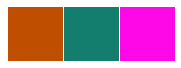

In [7]:
import seaborn as sns
#palette_modes = sns.xkcd_palette(["strawberry","bluish purple", "orange yellow", 
#                                  "bright magenta", "brownish grey", "british racing green", "light grey blue"])
palette_modes = sns.xkcd_palette(["burnt orange", "blue green", "bright magenta"])
sns.palplot(palette_modes)

In [8]:
mode_names = ["A", "B", "C", "IV", "V", "VI", "VII"]


In [9]:
sns.set_style("ticks")

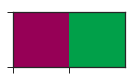

In [10]:
colors = ["dark magenta", "emerald"]
palette_multipoles = sns.xkcd_palette(colors)
sns.palplot(palette_multipoles)

In [11]:
for count, group in enumerate(wanted_groups):
    I, s = group_current(full_modes, group, pw)
    filename = "holey-disk-modes-{:02d}.vtp".format(count)
    if savefigs:
        sim.plot_3d(solution=I, output_format='vtk', filename=filename)

In [12]:
from matplotlib.pyplot import imread

In [13]:
dh = 0.1
tri_nodes = [(-0.5, -0.435+dh), (0.5, -0.435+dh), (0, 0.435+dh)]
# mode_markers = [tri_nodes, 'd', 's', 'p', 'h', '8', 'o']
mode_markers = ['o', '8', tri_nodes, 'p', 'h', '*', '^']

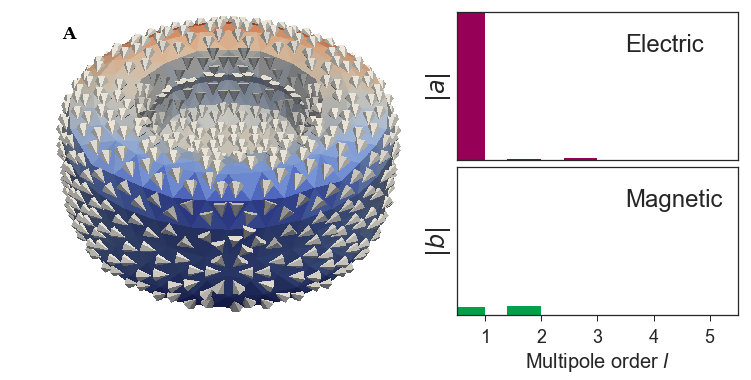

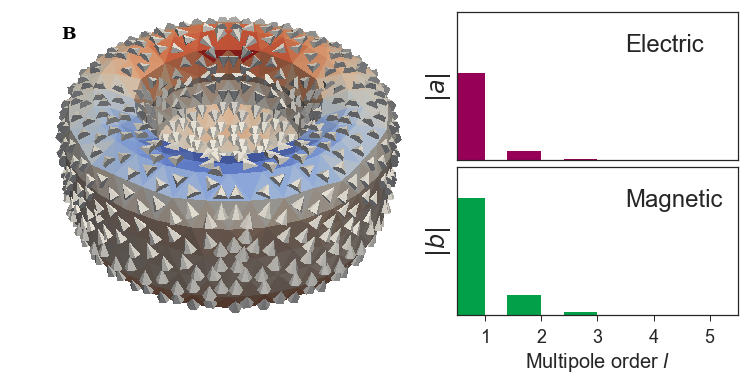

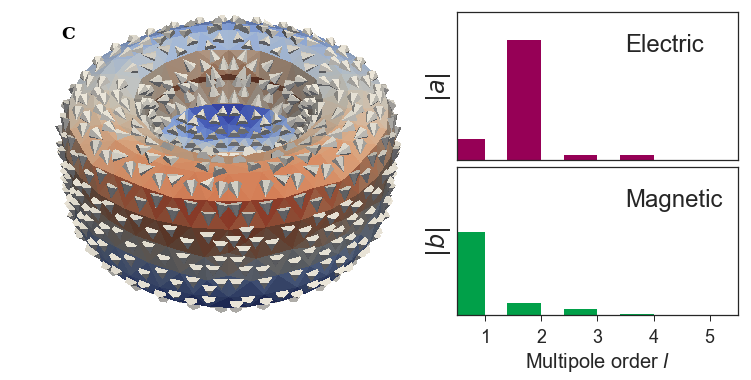

In [14]:
images = ["holey-disk-modes-{:02d}.png".format(n) for n in range(3)]

for count in range(3):
    I, s = group_current(full_modes, wanted_groups[count], pw)
    filename = "holes-combined-{:02d}".format(count)
    plot_current_multipoles(I, s, 5, images[count], palette_modes[count],
                            mode_markers[count], mode_names[count], filename=filename)